In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [168]:
data = pd.read_excel(r"C:\Users\Prashant\Downloads\beer dataset.xlsx")
data

,Zone,State,city,Customer Segment,Customer Name,Order Month,Product,Product Cat,Order Qty,Sale Qty,...,Product Cost per bottle,Profit Markup per bottle,Selling price per bottle,Gross margin %,Form costing,Overhead,Total product cost,Total SALES VALUE,Gross margin,Gross margin%
0,North,Haryana,Chandigarh,Retail,Spencers,Jan 2017,Beer,Budweiser,292,292.0,...,48.105,26.45775,74.56275,35.483871,12294.660,1752.0,14046.660,21772.32300,7725.66300,35.483871
1,North,Haryana,Chandigarh,Retail,Spencers,Jan 2017,Beer,Carlsberg,110,110.0,...,48.105,26.45775,74.56275,35.483871,4631.550,660.0,5291.550,8201.90250,2910.35250,35.483871
2,North,Haryana,Chandigarh,Retail,Spencers,Jan 2017,Beer,Kingfisher Premium,797,797.0,...,48.105,26.45775,74.56275,35.483871,33557.685,4782.0,38339.685,59426.51175,21086.82675,35.483871
3,North,Haryana,Chandigarh,Retail,Spencers,Jan 2017,Beer,Tuborg,669,669.0,...,48.105,26.45775,74.56275,35.483871,28168.245,4014.0,32182.245,49882.47975,17700.23475,35.483871
4,North,Haryana,Chandigarh,Retail,Spencers,Jan 2017,RUM,Angosture,847,847.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139759,West,Daman & Diu,Daman,Tourism,Novotel,Dec 2019,Scotch,Royal Stag,979,881.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139760,West,Daman & Diu,Daman,Tourism,Novotel,Dec 2019,Vodka,Absolute Vodka,246,221.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139761,West,Daman & Diu,Daman,Tourism,Novotel,Dec 2019,Vodka,Grey Goose,992,892.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139762,West,Daman & Diu,Daman,Tourism,Novotel,Dec 2019,Vodka,Magic Moment,390,351.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####  inspect its contents:--

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139764 entries, 0 to 139763
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Zone                            139764 non-null  object 
 1   State                           139764 non-null  object 
 2   city                            139764 non-null  object 
 3   Customer Segment                139764 non-null  object 
 4   Customer Name                   139764 non-null  object 
 5   Order Month                     139764 non-null  object 
 6   Product                         139764 non-null  object 
 7   Product Cat                     139764 non-null  object 
 8   Order Qty                       139764 non-null  int64  
 9   Sale Qty                        139764 non-null  float64
 10  Form Costing per bottle         34932 non-null   float64
 11  Other Overhead cost per bottle  34932 non-null   float64
 12  Product Cost per

In [170]:
data.describe()

,Order Qty,Sale Qty,Form Costing per bottle,Other Overhead cost per bottle,Product Cost per bottle,Profit Markup per bottle,Selling price per bottle,Gross margin %,Form costing,Overhead,Total product cost,Total SALES VALUE,Gross margin,Gross margin%
count,139764.000000,139764.000000,34932.000000,34932.000000,34932.000000,34932.000000,34932.000000,3.493200e+04,34932.000000,34932.000000,34932.000000,34932.000000,34932.000000,3.493200e+04
mean,600.595754,567.342548,41.776058,7.153784,48.929843,26.911414,75.841256,3.548387e+01,27711.892265,4052.758884,27712.213117,42953.930331,15241.717214,3.548387e+01
std,288.932101,274.226855,0.192650,0.769205,0.779353,0.428644,1.207998,7.461142e-15,13466.298133,2026.738012,13466.316805,20872.791048,7406.474243,8.613483e-15
min,100.000000,90.000000,41.510958,6.000000,47.618531,26.190192,73.808723,3.548387e+01,4293.523077,540.000000,4293.523077,6654.960770,2361.437693,3.548387e+01
25%,351.000000,330.300000,41.617315,7.000000,48.510958,26.681027,75.191984,3.548387e+01,16075.801458,2318.400000,16075.801458,24917.492260,8841.690802,3.548387e+01
50%,601.000000,566.720000,41.712453,7.000000,48.813872,26.847629,75.661501,3.548387e+01,27561.250883,3975.300000,27561.250883,42719.938869,15158.687986,3.548387e+01
75%,851.000000,802.822500,41.962231,8.000000,49.619661,27.290813,76.910474,3.548387e+01,39230.725101,5673.220000,39230.725101,60807.623906,21576.898805,3.548387e+01
max,1100.000000,1100.000000,42.162670,8.000000,50.145380,27.579959,77.725340,3.548387e+01,54056.720143,8712.000000,54056.720143,83787.916221,29731.196078,3.548387e+01


#### Data Cleaning and Preparation :-

###### Handling Missing Values :--

In [171]:
##### Check for missing values
missing_values = data.isnull().sum()
missing_values

Zone                                   0
State                                  0
city                                   0
Customer Segment                       0
Customer Name                          0
Order Month                            0
Product                                0
Product Cat                            0
Order Qty                              0
Sale Qty                               0
Form Costing per bottle           104832
Other Overhead cost per bottle    104832
Product Cost per bottle           104832
Profit Markup per bottle          104832
Selling price per bottle          104832
Gross margin %                    104832
Form costing                      104832
Overhead                          104832
Total product cost                104832
Total SALES VALUE                 104832
Gross margin                      104832
Gross margin%                     104832
dtype: int64

In [172]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Prashant\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


##### Visualize Missing Values :--

###### """The customized missing data matrix plot makes it easy to see where data is missing in the dataset. By increasing the figure size and adjusting the font sizes and label orientations, all column names and details are clearly visible. The added title and axis labels improve understanding, making it a useful tool for spotting patterns of missing data. This helps in cleaning and preparing the data more effectively for analysis."""

<Figure size 2000x800 with 0 Axes>

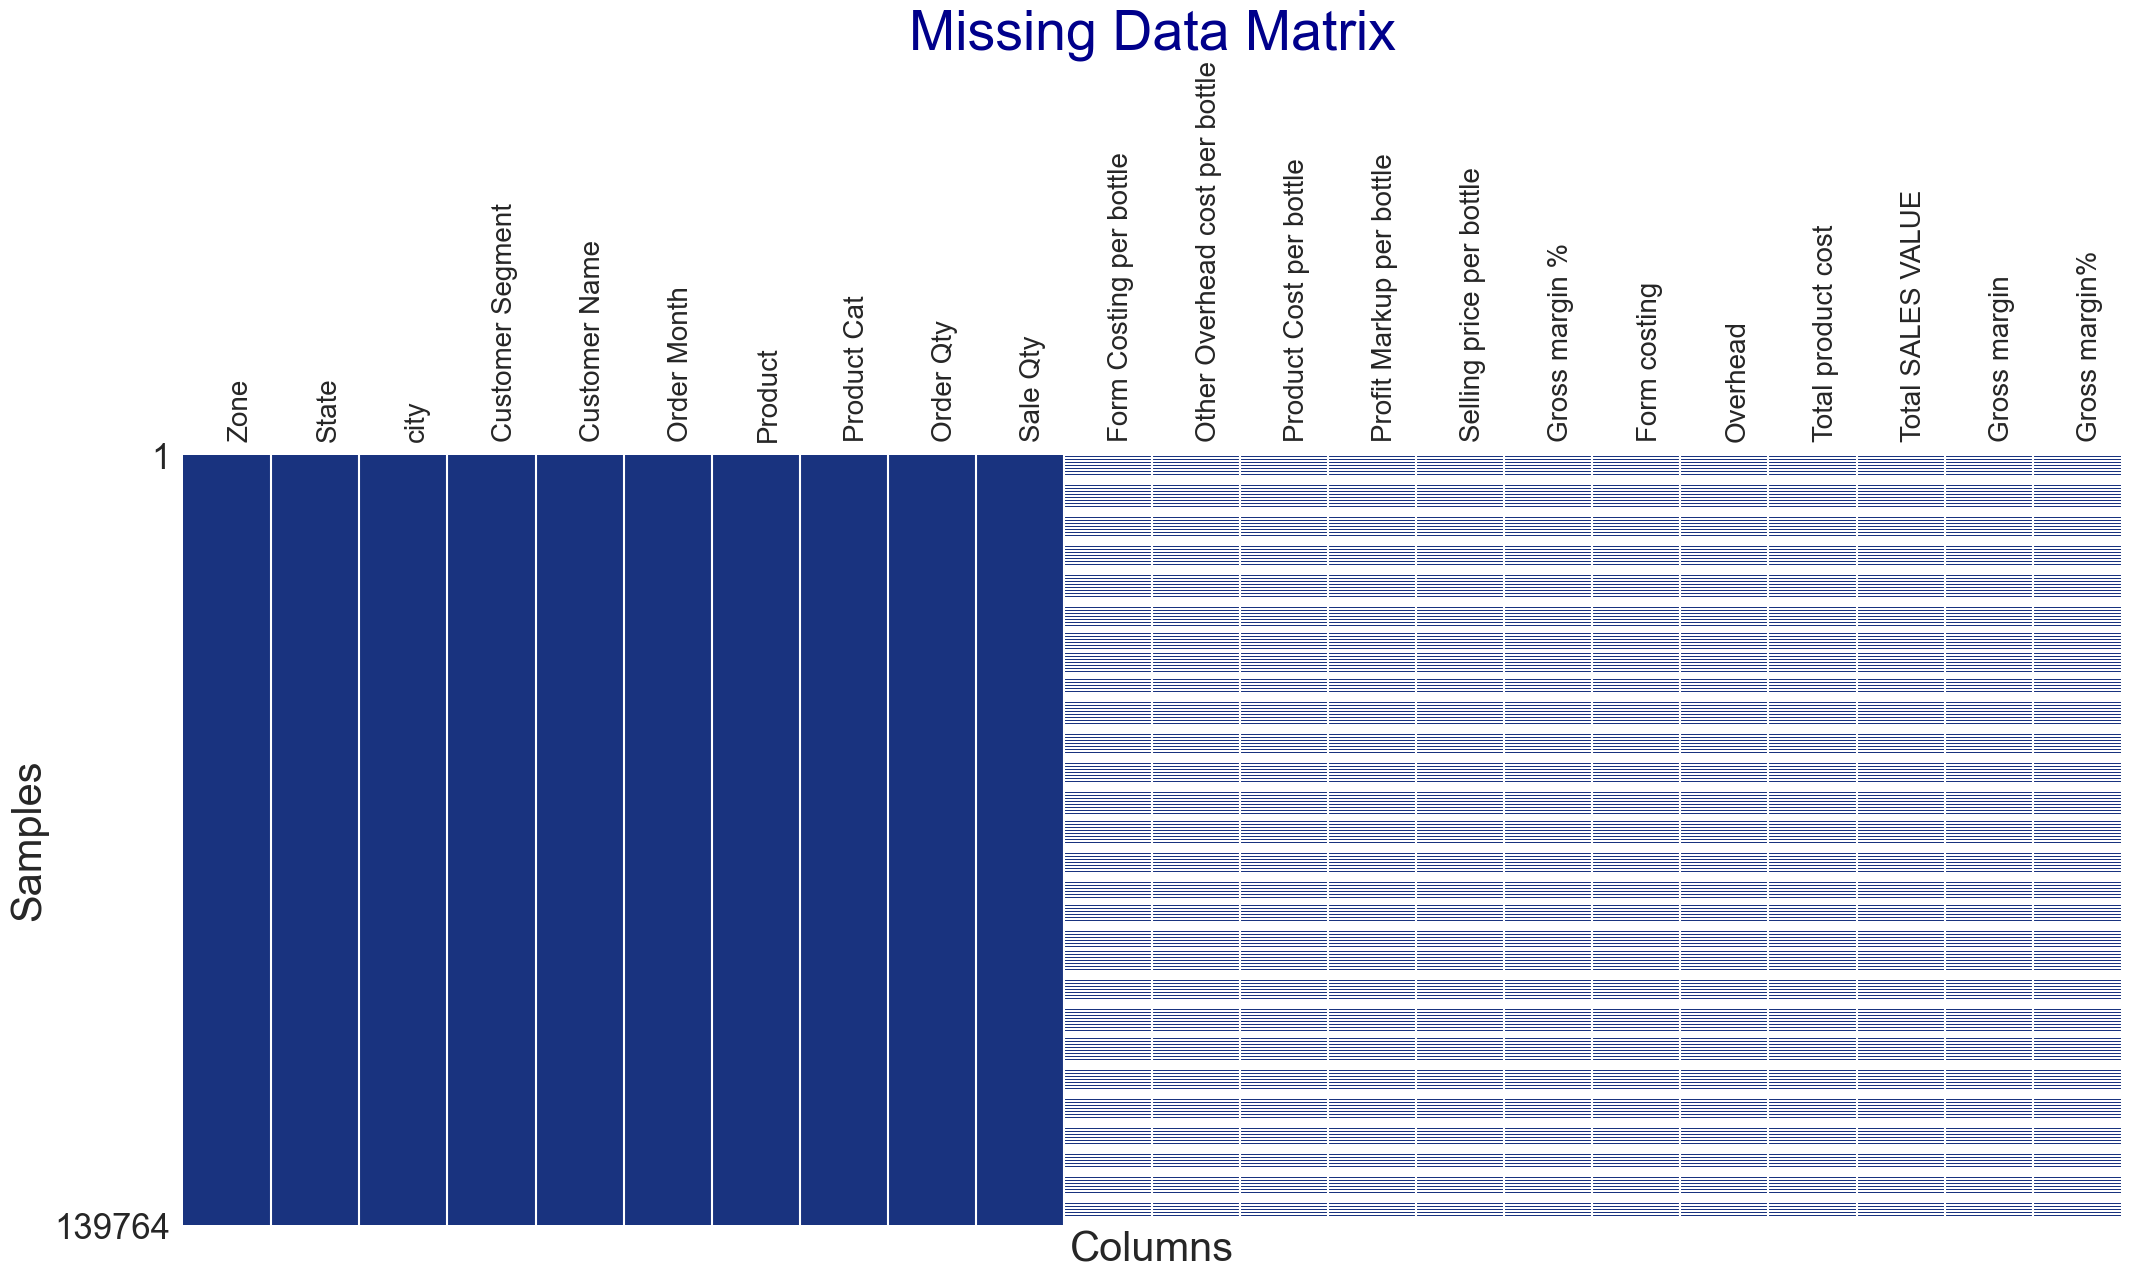

In [173]:
# Customize the missingno plot
plt.figure(figsize=(20, 8))  # Increase the figure size
msno.matrix(data, sparkline=False, fontsize=20, color=(0.1, 0.2, 0.5))

# Customize the x-axis labels
plt.xticks(rotation=90, fontsize=20)  # Rotate and adjust font size for x-axis labels

# Add title and labels
plt.title('Missing Data Matrix', fontsize=40, color='darkblue')
plt.xlabel('Columns', fontsize=30)
plt.ylabel('Samples', fontsize=30)

# Show the plot
plt.show()

In [174]:
column = data.columns
column

Index(['Zone', 'State', 'city', 'Customer Segment', 'Customer Name',
       'Order Month', 'Product', 'Product Cat', 'Order Qty', 'Sale Qty',
       'Form Costing per bottle', 'Other Overhead cost per bottle',
       'Product Cost per bottle', 'Profit Markup per bottle',
       'Selling price per bottle', 'Gross margin %', 'Form costing ',
       'Overhead', 'Total product cost', 'Total SALES VALUE', 'Gross margin',
       'Gross margin%'],
      dtype='object')

##### Drop Columns with Excessive Missing Data :--
1.Identify Columns to Drop:
The code selects columns to remove based on their positional indices (from position 10 to 21).

2.Drop the Columns:
It then uses the drop() method to remove these columns from the DataFrame directly, updating the DataFrame in place.

3.Purpose:
This approach helps streamline the DataFrame by removing unwanted columns based on their positions, making it more manageable for analysis.

In [175]:
# List of columns to drop by their positions (e.g., positions 10 to 22)
cols_to_drop = data.columns[10:22]

# Drop the columns by their positions
data.drop(columns=cols_to_drop, inplace=True)

In [176]:
data.columns

Index(['Zone', 'State', 'city', 'Customer Segment', 'Customer Name',
       'Order Month', 'Product', 'Product Cat', 'Order Qty', 'Sale Qty'],
      dtype='object')

In [177]:
data.dtypes

Zone                 object
State                object
city                 object
Customer Segment     object
Customer Name        object
Order Month          object
Product              object
Product Cat          object
Order Qty             int64
Sale Qty            float64
dtype: object

#### Standardizing Dates and Aggregating Sales Data

###### """The code standardizes non-standard month names, converts the 'Order Month' column to a datetime format, and removes any unparseable dates, before aggregating the sales data by month to analyze trends."""

###### 1.. Standardize Date Format:-- The code first addresses non-standard month names in the 'Order Month' column by mapping them to their standard equivalents (e.g., "Mac" to "Mar"). This ensures that all month names are consistent for accurate parsing.

###### 2..Convert to Datetime and Handle Missing Dates:-- It then converts the 'Order Month' column to a datetime format. Any dates that can't be parsed are identified and removed from the dataset to ensure clean, usable data for analysis.

###### 3..Aggregate and Analyze:-- Finally, the code groups the data by 'Order Month' and calculates the total sales quantity for each month. This aggregation allows for a clear analysis of sales trends over time.

In [178]:
# Create a mapping for non-standard month names if necessary
month_mapping = {
    "Mac": "Mar",
    # Add other non-standard month names here if needed
}

# Replace non-standard month names
for non_std, std in month_mapping.items():
    data['Order Month'] = data['Order Month'].str.replace(non_std, std)

# Ensure the 'Order Month' is in datetime format
data['Order Month'] = pd.to_datetime(data['Order Month'], format='%b %Y', errors='coerce')

# Verify if there are any NaT values after conversion
missing_dates = data['Order Month'].isna().sum()
if missing_dates > 0:
    print(f"There are {missing_dates} unparseable dates in the 'Order Month' column.")

# Drop rows with NaT values in 'Order Month'
data.dropna(subset=['Order Month'], inplace=True)

# Group by 'Order Month' and sum 'Sale Qty'
monthly_sales = data.groupby('Order Month')['Sale Qty'].sum()

There are 32256 unparseable dates in the 'Order Month' column.


#### Monthly Sales Trends

###### """The code converts the 'Order Month' column to datetime format, aggregates sales quantities by month, and plots an attractive line graph to visualize monthly sales trends clearly and effectively."""

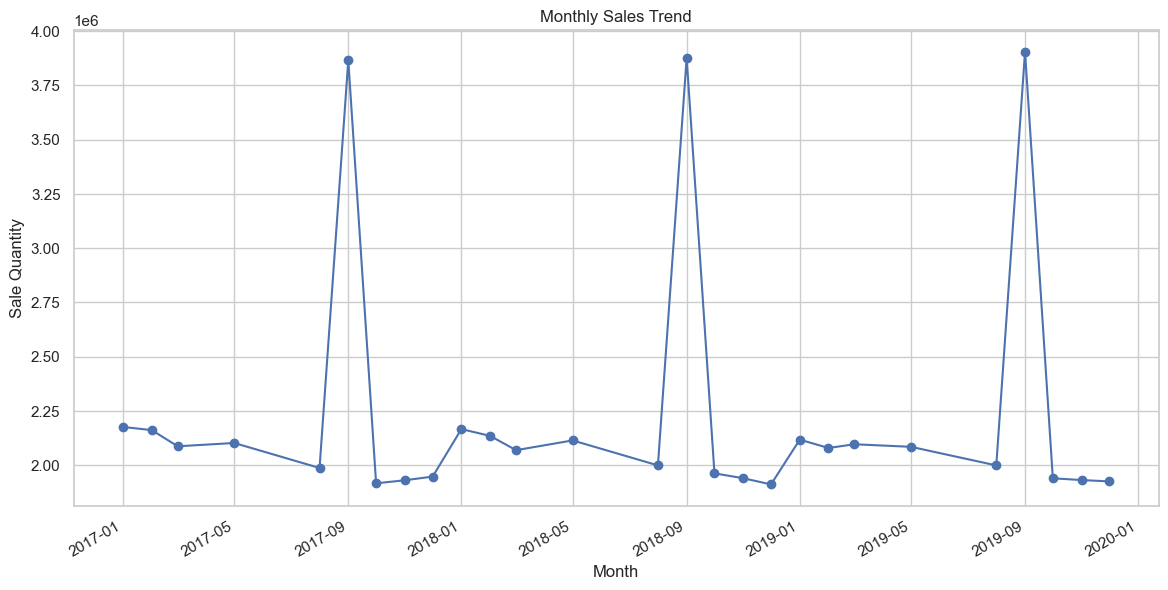

In [179]:
# Ensure the 'Order Month' is in datetime format
data['Order Month'] = pd.to_datetime(data['Order Month'])

# Group by 'Order Month' and sum 'Sale Qty'
monthly_sales = data.groupby('Order Month')['Sale Qty'].sum()

# Plot the monthly sales trend
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sale Quantity')
plt.grid(True)
plt.show()

#### Popular Beer Brands and Categories

###### """"The code aggregates total sales quantities by beer brand, identifies the top 10 brands, and visualizes their popularity with a bar chart. This chart highlights the most popular beer brands based on sales quantity, making it easy to identify leading products in the dataset.""""

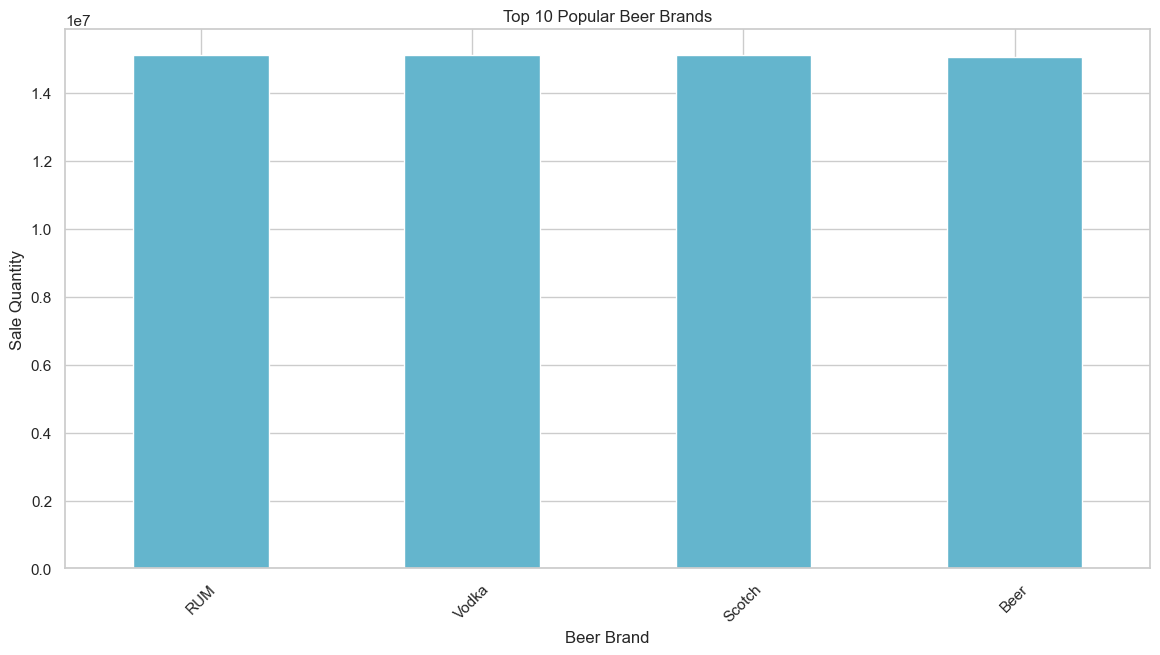

In [180]:
# Group by 'Product' and sum 'Sale Qty'
popular_brands = data.groupby('Product')['Sale Qty'].sum().sort_values(ascending=False)

# Plot the top 10 popular beer brands
plt.figure(figsize=(14, 7))
popular_brands.head(10).plot(kind='bar', color='c')
plt.title('Top 10 Popular Beer Brands')
plt.xlabel('Beer Brand')
plt.ylabel('Sale Quantity')
plt.xticks(rotation=45)
plt.show()


#### Seasonal Sales Patterns

###### """"The code creates a 'Season' column based on the month of the year, aggregates sales quantities by season, and visualizes seasonal sales patterns with a bar chart. This chart helps in understanding how sales vary across different seasons, making it easier to identify trends and seasonal preferences.""""

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20084\964987782.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Sale Qty', data=seasonal_sales, palette='coolwarm', order=['Winter', 'Spring', 'Summer', 'Fall'])


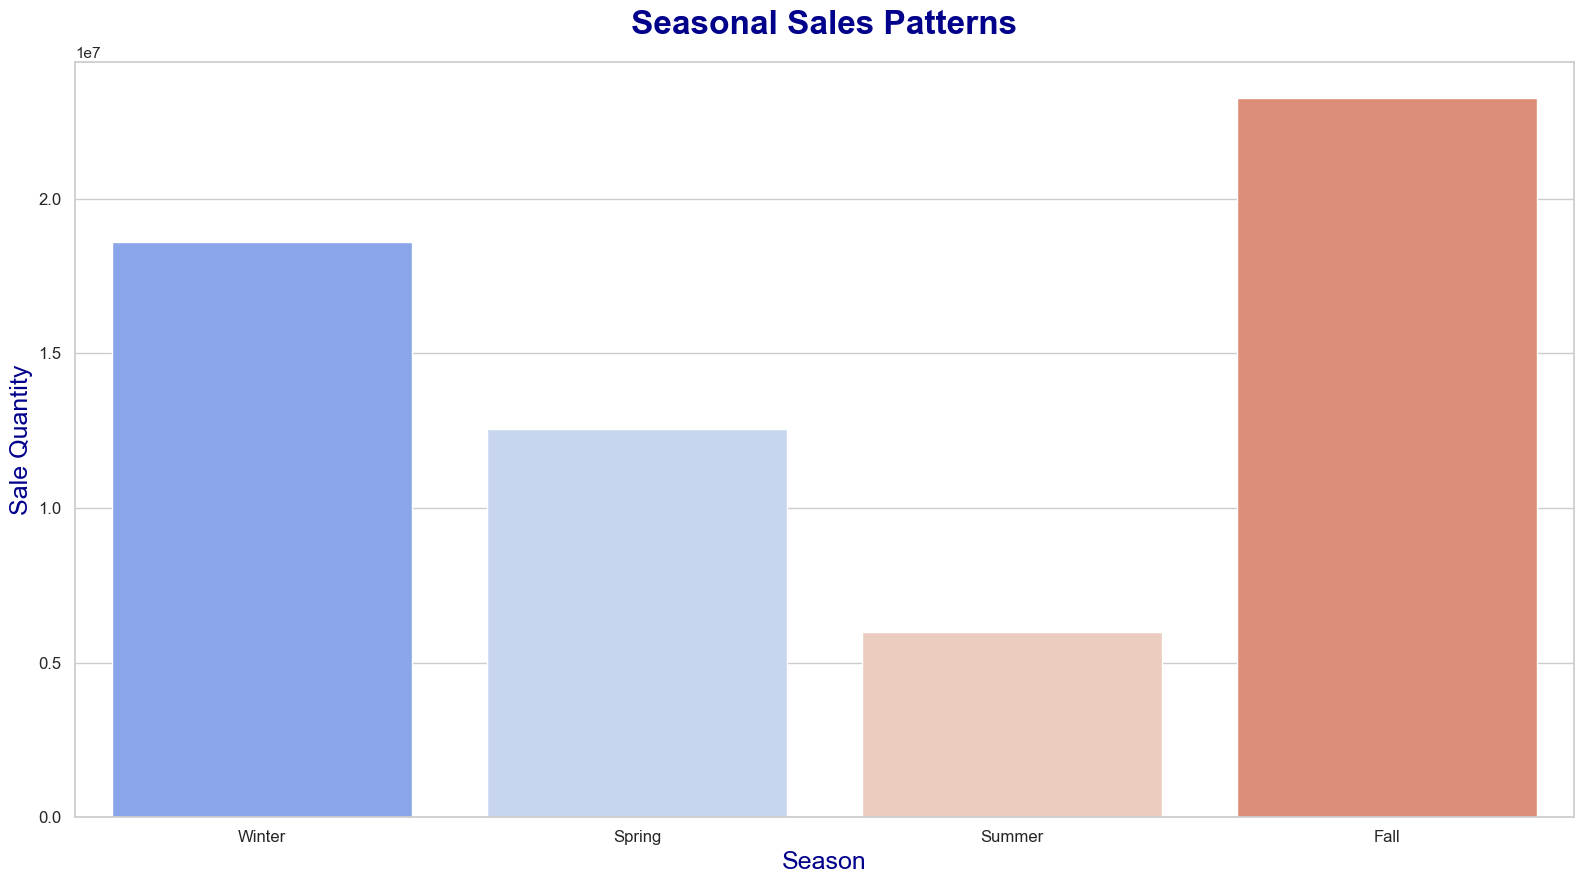

In [181]:
# Extract month and create a 'Season' column
data['Month'] = data['Order Month'].dt.month
data['Season'] = data['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 
                                               ('Spring' if x in [3, 4, 5] else 
                                               ('Summer' if x in [6, 7, 8] else 'Fall')))

# Group by 'Season' and sum 'Sale Qty'
seasonal_sales = data.groupby('Season')['Sale Qty'].sum().reset_index()

# Plot seasonal sales patterns
plt.figure(figsize=(16, 9))
sns.barplot(x='Season', y='Sale Qty', data=seasonal_sales, palette='coolwarm', order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Seasonal Sales Patterns', fontsize=24, color='darkblue', weight='bold', pad=20)
plt.xlabel('Season', fontsize=18, color='darkblue')
plt.ylabel('Sale Quantity', fontsize=18, color='darkblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


#### Regional Preferences

###### """"The code aggregates sales quantities by region and visualizes the data with a horizontal bar chart. This chart effectively displays regional sales preferences, highlighting which zones have the highest and lowest sales quantities, and helps in identifying regional performance trends.""""

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20084\1424449733.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sale Qty', y='Zone', data=regional_sales, palette='pastel')


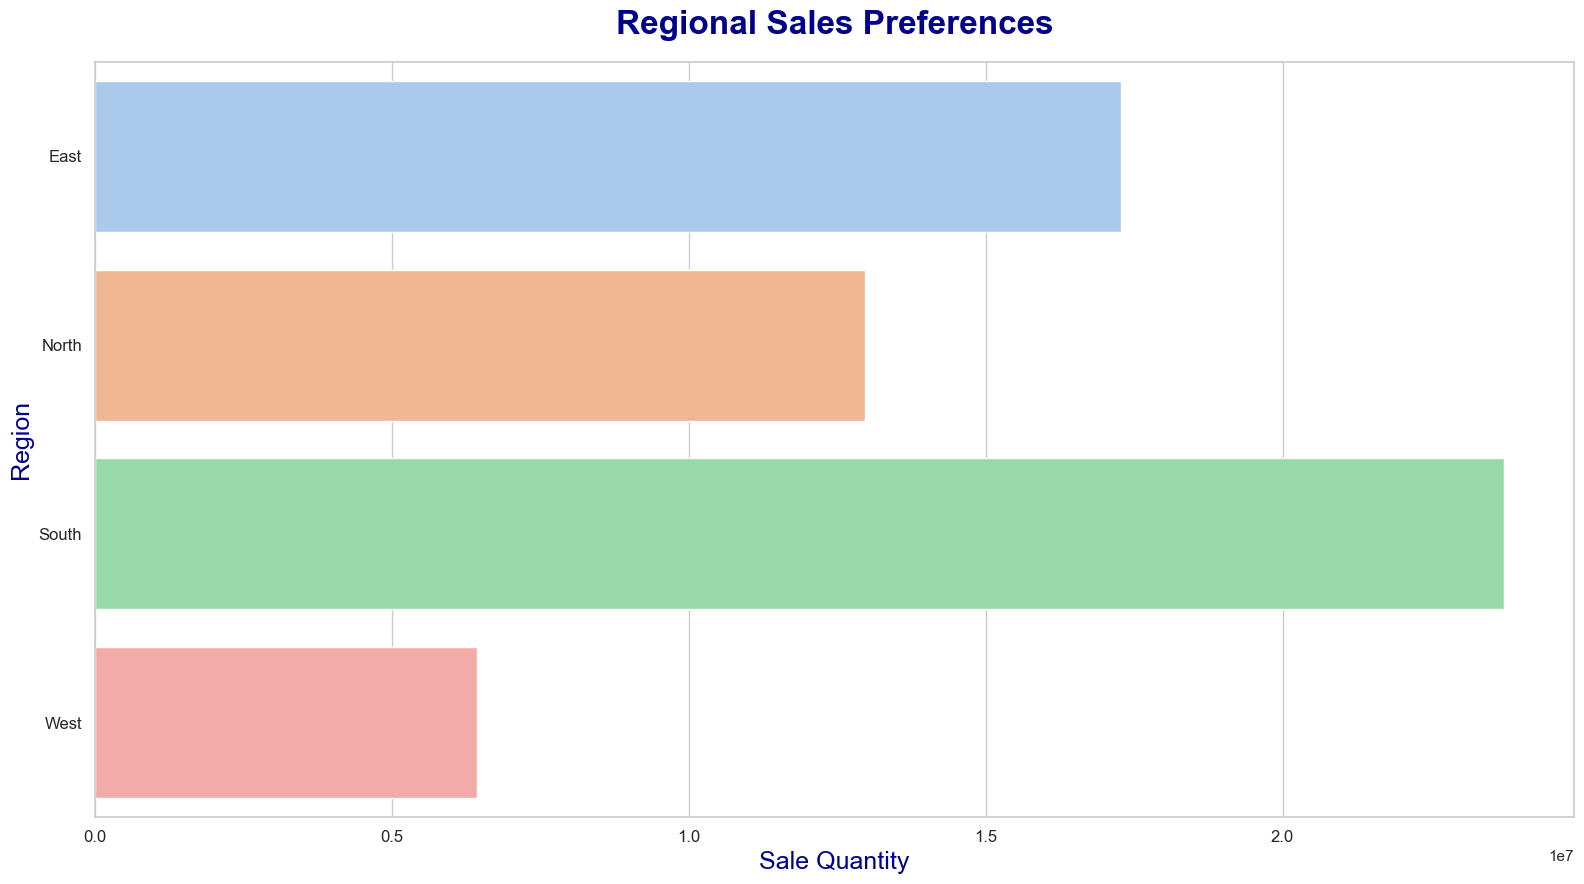

In [182]:
# Group by 'Zone' and sum 'Sale Qty'
regional_sales = data.groupby('Zone')['Sale Qty'].sum().reset_index()

# Plot regional sales preferences
plt.figure(figsize=(16, 9))
sns.barplot(x='Sale Qty', y='Zone', data=regional_sales, palette='pastel')
plt.title('Regional Sales Preferences', fontsize=24, color='darkblue', weight='bold', pad=20)
plt.xlabel('Sale Quantity', fontsize=18, color='darkblue')
plt.ylabel('Region', fontsize=18, color='darkblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


#### Analysis of Sales by Customer Segment

###### 1.. Group by Customer Segment:-- The code groups the sales data by 'Customer Segment' and calculates the total sales quantity for each segment. This provides insight into which customer segments contribute most to the sales.

###### 2.. Visualize Sales Data:-- A bar chart is created to visually represent the sales quantities across different customer segments. This allows for easy comparison and identification of key customer segments driving sales.

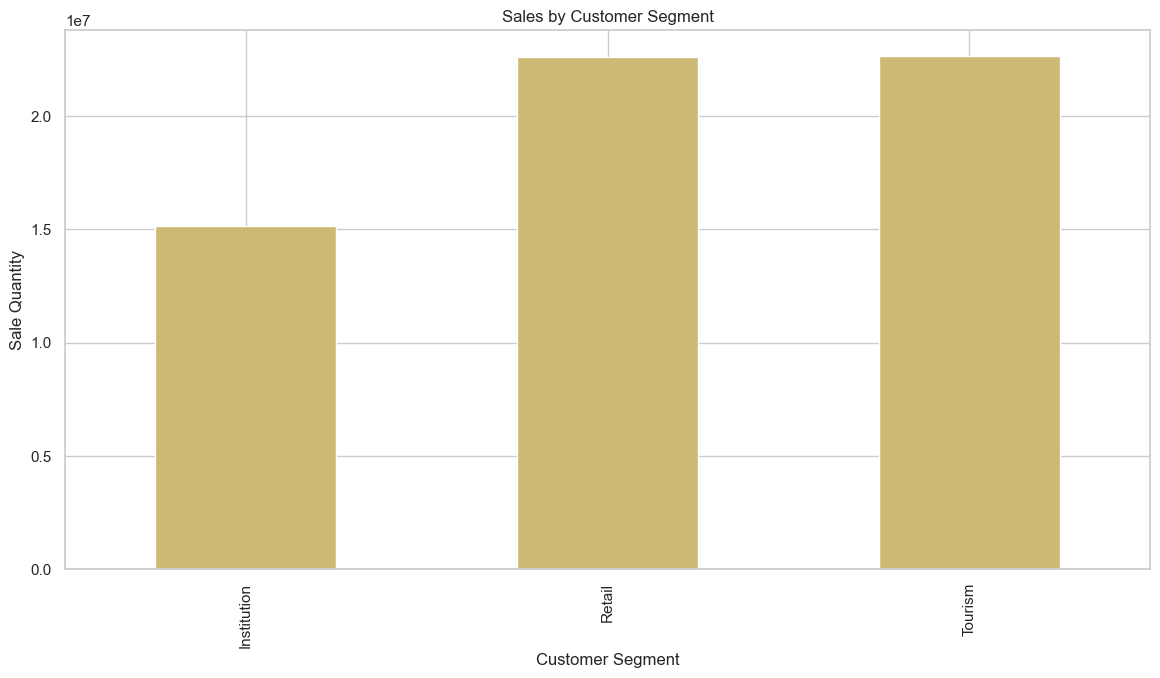

In [183]:
# Group by 'Customer Segment' and sum 'Sale Qty'
segment_sales = data.groupby('Customer Segment')['Sale Qty'].sum()

# Plot sales by customer segment
plt.figure(figsize=(14, 7))
segment_sales.plot(kind='bar', color='y')
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sale Quantity')
plt.show()


In [184]:
data.to_csv('transformed_beer_data.csv', index=False)
